In [1]:

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import utils.analyze_load_utils
import utils.analyze_utils

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import importlib

# EXPERIMENT CONFIGURATION

In [2]:
BASE = 'MAZE'
ENV = "Maze7-v0" 
FRIENDLY_ENV = "MAZE 7" 
ER_SAMPLES_NUMBER_LIST = ['3-ER', '3-EER', '3-EER_reward', '3-EER_reward-unique']
EXPERIMENT_NAME = "Maze7_PER_EXP10"

In [3]:
importlib.reload(utils.analyze_load_utils)
loader = utils.analyze_load_utils.Loader(BASE, EXPERIMENT_NAME, ENV, M = ER_SAMPLES_NUMBER_LIST)
acs2_data, acs2er_data, acs2_data_full, acs2er_data_full = loader.load()

In [4]:
importlib.reload(utils.analyze_utils)
config = utils.analyze_utils.AnalyzerConfiguration(
  BASE_NAME=BASE, 
  EXP_NAME=EXPERIMENT_NAME,
  ENV_NAME=ENV,
  FRIENDLY_ENV_NAME=FRIENDLY_ENV,
  M=ER_SAMPLES_NUMBER_LIST,
  DATA_BASE_PATH=BASE)
analyzer = utils.analyze_utils.Analyzer(acs2_data, acs2er_data, config, acs2_data_full, acs2er_data_full)

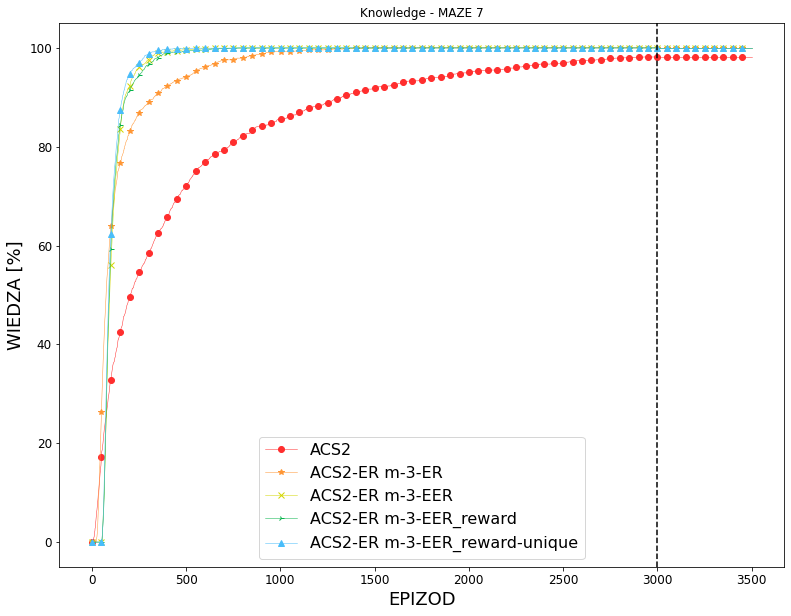

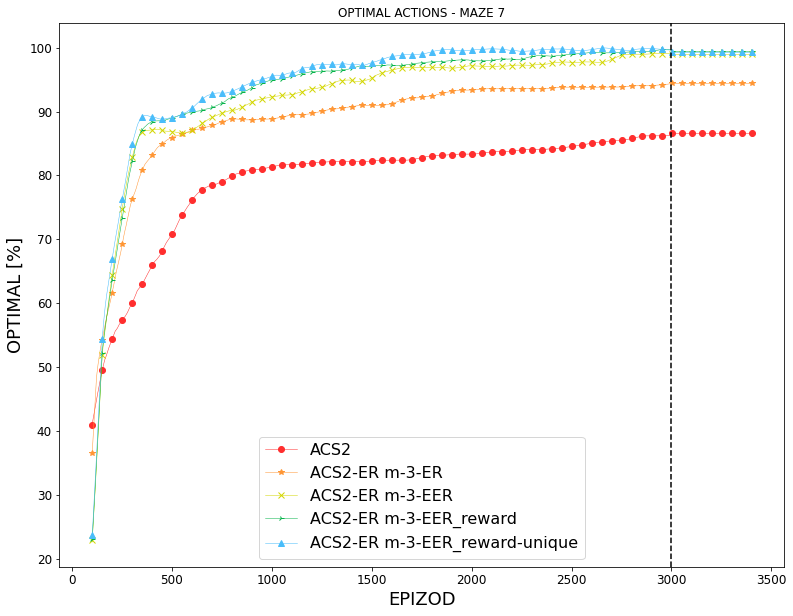

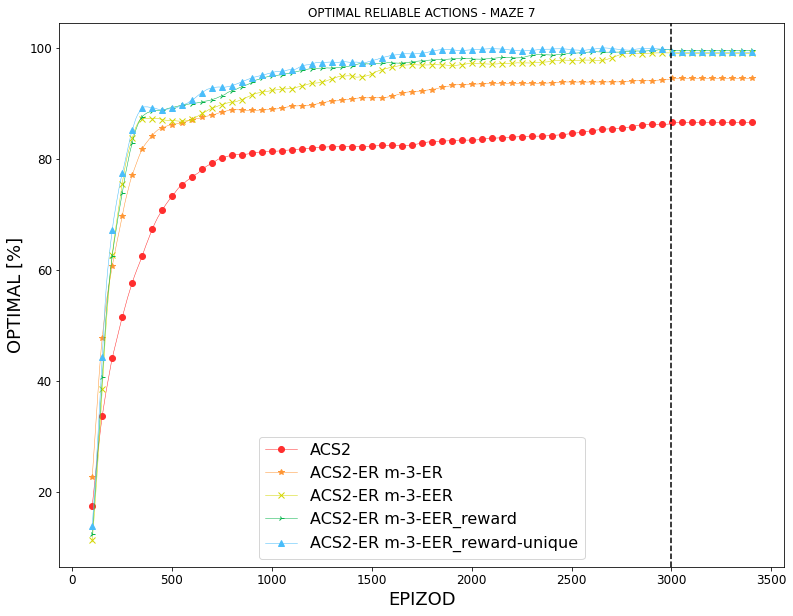

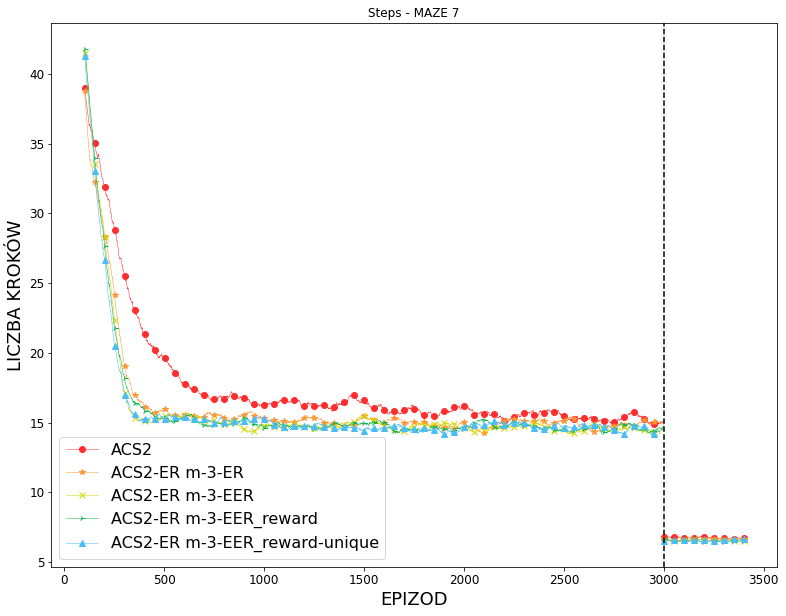

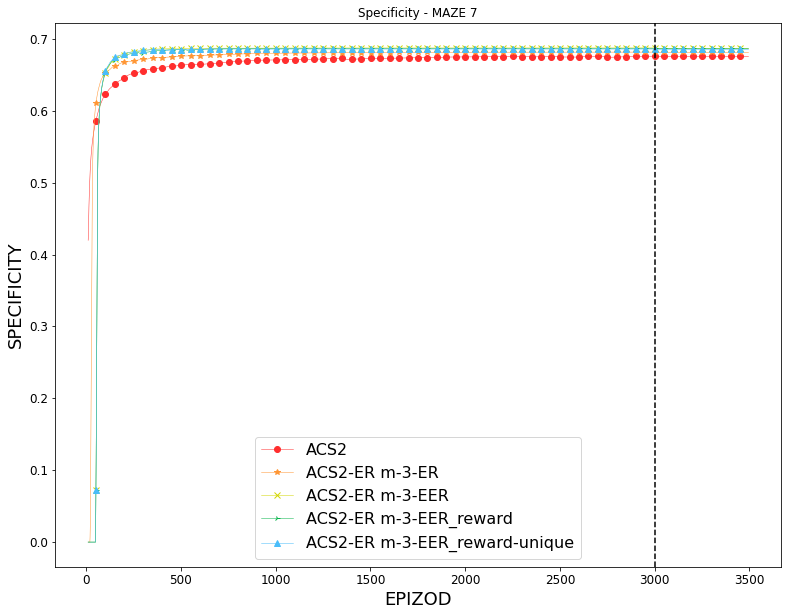

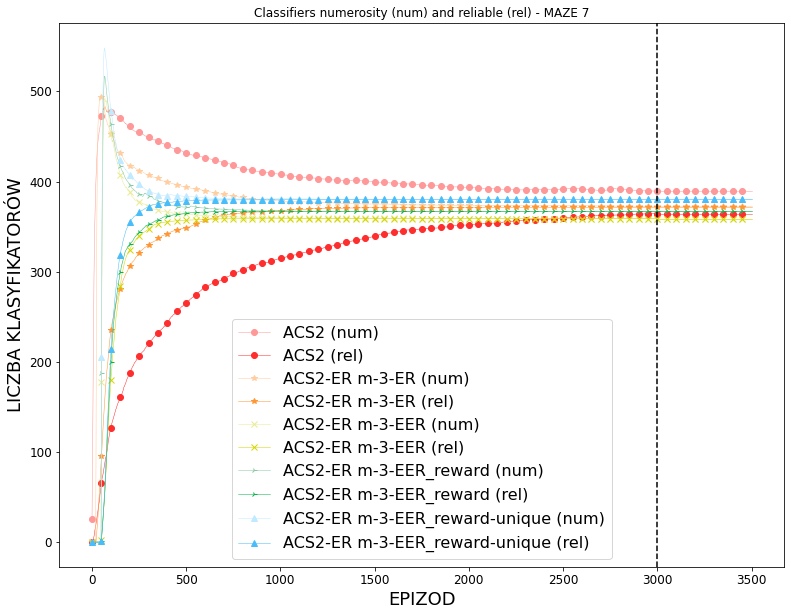

In [5]:
analyzer.plot_knowledge(width=0.5)
analyzer.plot_optimal(width=0.5, exploit_avg_win=100, explore_avg_win=100)
analyzer.plot_optimal_reliable(width=0.5, exploit_avg_win=100, explore_avg_win=100)
analyzer.plot_steps(exploit_avg_win=100, explore_avg_win=100, width=0.5)
# analyzer.plot_avg_steps(exploit_avg_win=10, explore_avg_win=10, width=0.5)
analyzer.plot_specificity(exploit_avg_win=10, explore_avg_win=10, width=0.5)
analyzer.plot_classifiers(width=0.5)

In [6]:
analyzer.compare_knowledge_above_threshold_welch_test(95)  # all 30 observations used
analyzer.compare_steps_average_welch_test(0, 5000) # all 30 observations used

                               ACS2-ER m--1        ACS2-ER m-3-ER       ACS2-ER m-3-EER      ACS2-ER m-3-EER_reward    ACS2-ER m-3-EER_reward-unique
-----------------------------  ------------------  -------------------  -------------------  ------------------------  -------------------------------
ACS2-ER m--1                   s: 0.0, p: 1.0      s: 10.939, p: 0.0    s: 14.179, p: 0.0    s: 13.914, p: 0.0         s: 14.394, p: 0.0
ACS2-ER m-3-ER                 s: -10.939, p: 0.0  s: 0.0, p: 1.0       s: 4.372, p: 0.0     s: 3.877, p: 0.001        s: 4.817, p: 0.0
ACS2-ER m-3-EER                s: -14.179, p: 0.0  s: -4.372, p: 0.0    s: 0.0, p: 1.0       s: -1.327, p: 0.198       s: 1.806, p: 0.085
ACS2-ER m-3-EER_reward         s: -13.914, p: 0.0  s: -3.877, p: 0.001  s: 1.327, p: 0.198   s: 0.0, p: 1.0            s: 2.737, p: 0.012
ACS2-ER m-3-EER_reward-unique  s: -14.394, p: 0.0  s: -4.817, p: 0.0    s: -1.806, p: 0.085  s: -2.737, p: 0.012       s: 0.0, p: 1.0
                 